<a href="https://colab.research.google.com/github/yuri-weasley/imersaodadospython/blob/main/aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='experience_level'>

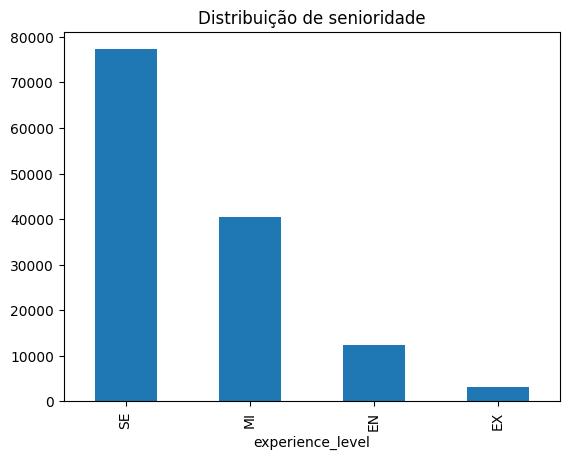

In [6]:
df['experience_level'].value_counts().plot(kind='bar', title='Distribuição de senioridade')

In [7]:
import seaborn as sns

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

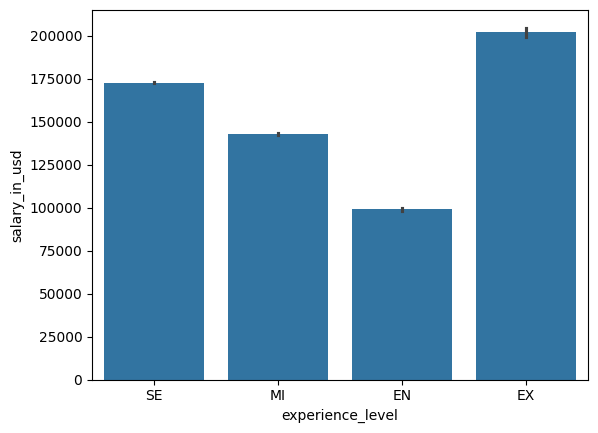

In [32]:
sns.barplot(data=df, x='experience_level', y='salary_in_usd')

In [10]:
import matplotlib.pyplot as plt

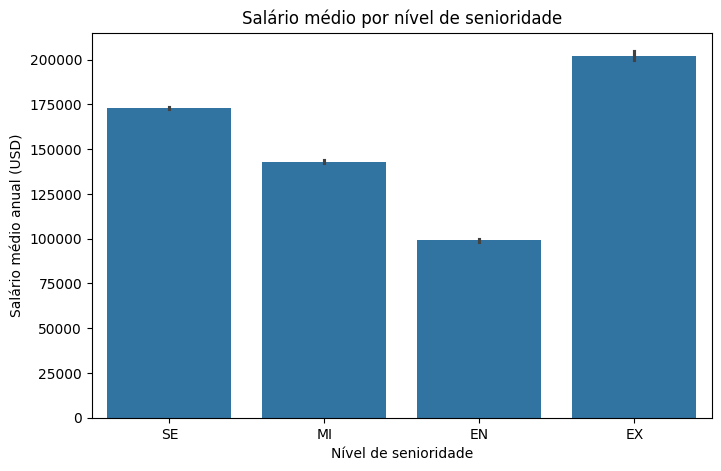

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

In [34]:
df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

,salary_in_usd
experience_level,
EX,202027.667813
SE,172850.003845
MI,143041.323489
EN,99039.040264


In [35]:
ordem = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True).index

In [17]:
ordem

Index(['EN', 'MI', 'SE', 'EX'], dtype='object', name='experience_level')

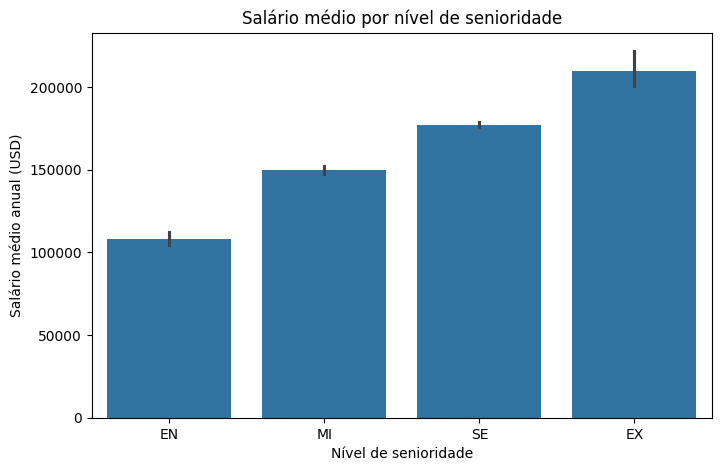

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='experience_level', y='salary', order=ordem)
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

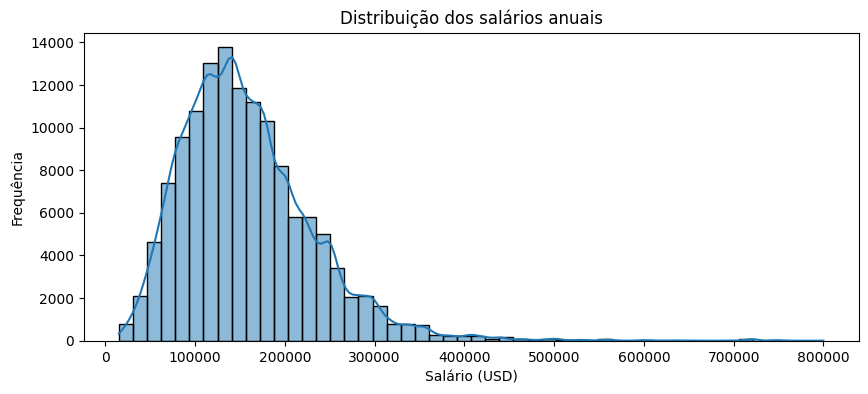

In [37]:
plt.figure(figsize=(10, 4))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.show()

Text(0.5, 0, 'Salário em USD')

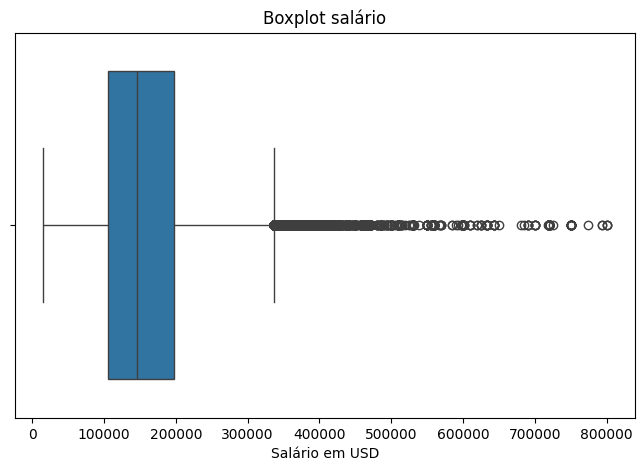

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Boxplot salário')
plt.xlabel('Salário em USD')

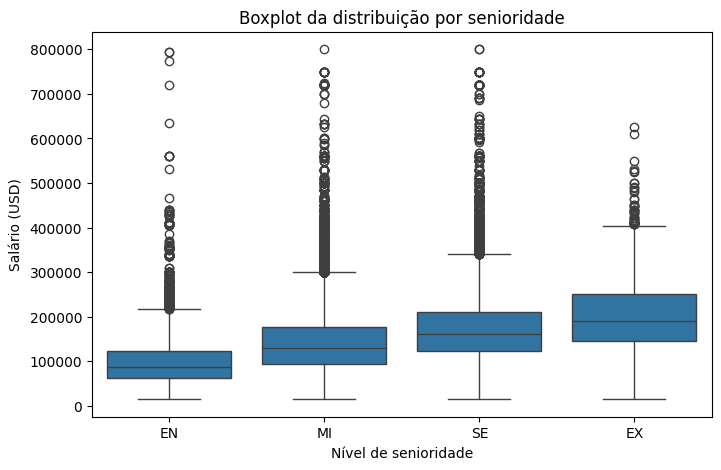

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=ordem)
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário (USD)')
plt.show()

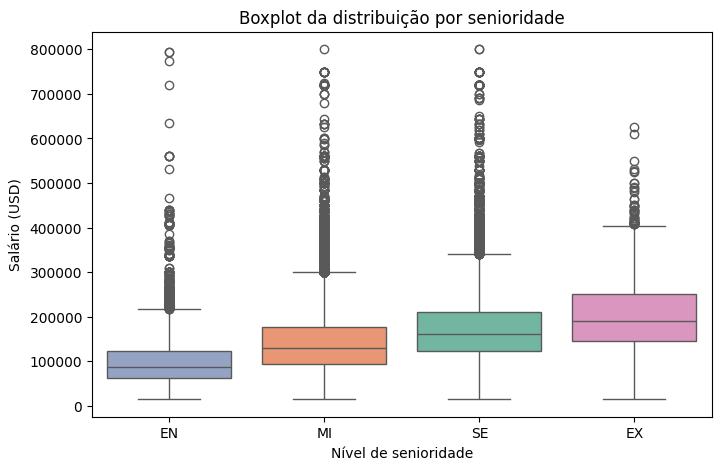

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=ordem, palette='Set2', hue='experience_level')
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Nível de senioridade')
plt.ylabel('Salário (USD)')
plt.show()

In [45]:
import plotly.express as px

In [46]:
df_avg_salary = df.groupby('experience_level')['salary_in_usd'].mean().reindex(ordem).reset_index()
fig = px.bar(df_avg_salary, x='experience_level', y='salary_in_usd',
             title='Salário médio por nível de senioridade',
             labels={'experience_level': 'Nível de senioridade', 'salary_in_usd': 'Salário médio anual (USD)'},
             category_orders={'experience_level': ordem})
fig.show()

In [48]:
remoto_contagem = df['remote_ratio'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title='Proporção dos tipos de trabalho'
             )
fig.show()

In [50]:
remoto_contagem = df['remote_ratio'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
             )

fig.update_traces(textinfo='percent+label')
fig.show()